In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from io import BytesIO
import requests

In [2]:
def load_data_from_url(url):
    response = requests.get(url)
    data = BytesIO(response.content)
    features, labels = load_svmlight_file(data)
    return features.toarray(), labels

# URL of the dataset
url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale'
features, labels = load_data_from_url(url)

In [3]:
# Convert to DataFrame
df = pd.DataFrame(features)
df['label'] = labels

In [20]:
print(df.head(2))  # Print the first few rows of the DataFrame
print(df.describe())  # Get a statistical summary of the DataFrame

          0         1         2         3    4         5         6         7  \
0 -0.294118  0.487437  0.180328 -0.292929 -1.0  0.001490 -0.531170 -0.033333   
1 -0.882353 -0.145729  0.081967 -0.414141 -1.0 -0.207153 -0.766866 -0.666667   

   label  
0   -1.0  
1    1.0  
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean    -0.547641    0.215020    0.132877   -0.585122   -0.811349   -0.046421   
std      0.396421    0.321333    0.317308    0.322267    0.272444    0.234997   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -0.882353   -0.005025    0.016393   -1.000000   -1.000000   -0.186289   
50%     -0.647059    0.175879    0.180328   -0.535354   -0.927896   -0.046200   
75%     -0.294118    0.409547    0.311475   -0.353535   -0.699173    0.090909   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score

class Perceptron:
    def __init__(self, N, alpha = 0.01):
        self.W = np.random.randn( N + 1 ) / np.sqrt(N)
        self.alpha = alpha
        self.losses = []
        self.accuracies = []
        
    def step(self, x):
        return 1 if x > 0 else 0
    
    
    def fit(self, X, y, epochs = 50):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0, epochs):
            error_count = 0
            for (x, target) in zip(X,y):
                p = self.step(np.dot(x, self.W))
                
                if p != target:
                    error = target - p
                    self.W += -self.alpha * error * x
                    error_count += 1
            self.losses.append(error_count)
            pred = self.predict(X, addBias=False)
            self.accuracies.append(accuracy_score(y, pred))
    
    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        if addBias:
            X = np.c_[X, np.ones((X.shape[0]))]
        return np.array([self.step(np.dot(x, self.W)) for x in X])

In [6]:
# Features (all columns except 'label')
features = df.drop('label', axis=1).values  # Ensure to convert to numpy array if not already

# Labels (the 'label' column)
labels = df['label'].values  # Ensure labels are in the correct form

In [17]:
#from pyimagesearch.nn import Perceptron
# Create a perceptron object; you can adjust the learning rate and number of iterations
perceptron = Perceptron(features.shape[1], alpha = 0.0001)

# Fit model on the data
perceptron.fit(features, labels, epochs = 50)

X = features
y = labels

In [18]:
def calculate_accuracy(X, y):
    correct_predictions = 0
    total_predictions = len(y)
    
    for (x, target) in zip(X, y):
        pred = perceptron.predict(x)
        if pred == target:
            correct_predictions += 1
    
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

accuracy = calculate_accuracy(X, y)
print("Accuracy of the Perceptron: {:.2f}%".format(accuracy))

Accuracy of the Perceptron: 65.10%


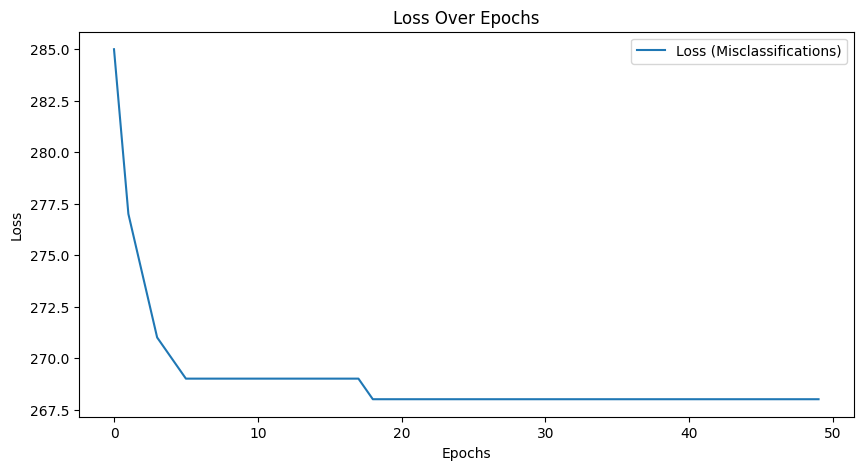

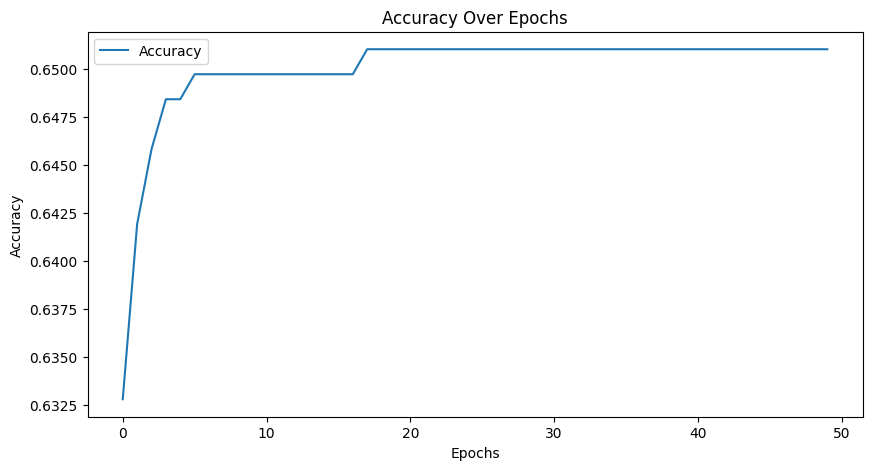

In [19]:
import matplotlib.pyplot as plt

# Plotting Loss (Number of Misclassifications)
plt.figure(figsize=(10, 5))
plt.plot(perceptron.losses, label='Loss (Misclassifications)')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(perceptron.accuracies, label='Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()